Saving Anexo ET_demo_round_traces_2022 (2).csv to Anexo ET_demo_round_traces_2022 (2) (3).csv


/tmp/ipython-input-4-2029468430.py:19: DtypeWarning: Columns (6,7) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('Anexo ET_demo_round_traces_2022 (2).csv', sep=';', on_bad_lines='skip')


📌 Resultados: REGRESIÓN LOGÍSTICA
              precision    recall  f1-score   support

           0       0.74      0.69      0.71      7908
           1       0.71      0.75      0.73      7924

    accuracy                           0.72     15832
   macro avg       0.72      0.72      0.72     15832
weighted avg       0.72      0.72      0.72     15832



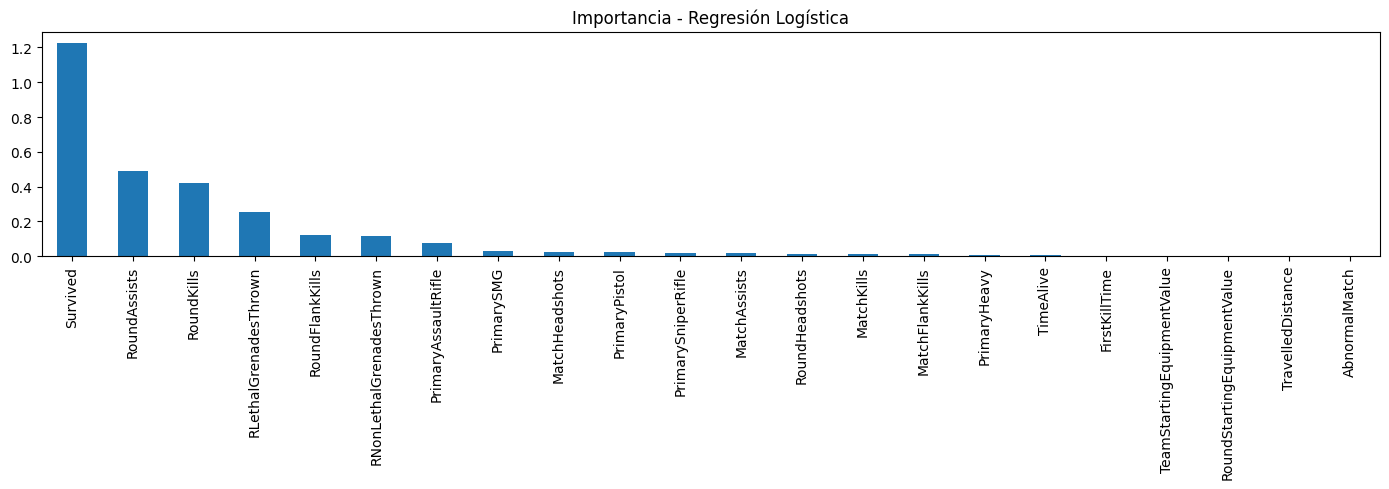

📌 Resultados: RANDOM FOREST
              precision    recall  f1-score   support

           0       0.75      0.73      0.74      7908
           1       0.74      0.75      0.75      7924

    accuracy                           0.74     15832
   macro avg       0.74      0.74      0.74     15832
weighted avg       0.74      0.74      0.74     15832



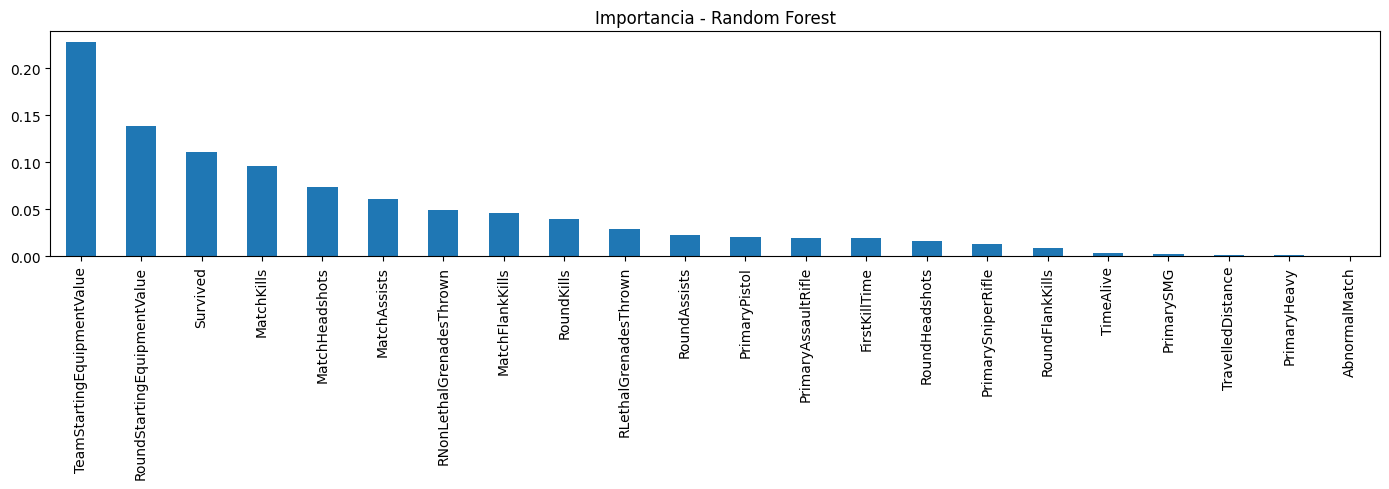

In [ ]:
  # PASO 1: Subir el archivo desde tu PC
from google.colab import files
uploaded = files.upload()  # Elige el archivo "Anexo ET_demo_round_traces_2022 (2).csv"

# PASO 2: Importar librerías
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.impute import SimpleImputer

# PASO 3: Cargar el archivo CSV
df = pd.read_csv('Anexo ET_demo_round_traces_2022 (2).csv', sep=';', on_bad_lines='skip')

# PASO 4: Preprocesamiento
df = df.copy()

# Convertir columnas de texto numérico a número real
for col in ['TimeAlive', 'TravelledDistance', 'FirstKillTime']:
    df[col] = pd.to_numeric(df[col], errors='coerce')

# Eliminar columnas poco útiles para el modelo
df = df.drop(columns=['Unnamed: 0', 'Map', 'Team', 'InternalTeamId', 'MatchId', 'RoundId', 'MatchWinner'])

# Convertir columna objetivo (ganar ronda) a 0 o 1
df['RoundWinner'] = df['RoundWinner'].astype(str)
df['RoundWinner'] = df['RoundWinner'].map({'True': 1, 'False': 0})

# Eliminar filas sin valor en la variable objetivo
df = df.dropna(subset=['RoundWinner'])

# Imputar valores faltantes numéricos con la media
X = df.drop(columns=['RoundWinner'])
imputer = SimpleImputer(strategy='mean')
X = pd.DataFrame(imputer.fit_transform(X), columns=X.columns)

y = df['RoundWinner'].astype(int)

# PASO 5: Separar en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# PASO 6: Modelo de Regresión Logística
lr = LogisticRegression(max_iter=1000)
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

print("📌 Resultados: REGRESIÓN LOGÍSTICA")
print(classification_report(y_test, y_pred_lr))

# Mostrar importancia de variables (valores absolutos de los coeficientes)
importance_lr = pd.Series(np.abs(lr.coef_[0]), index=X.columns)
importance_lr.sort_values(ascending=False).plot(kind='bar', figsize=(14,5), title='Importancia - Regresión Logística')
plt.tight_layout()
plt.show()

# PASO 7: Modelo de Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

print("📌 Resultados: RANDOM FOREST")
print(classification_report(y_test, y_pred_rf))

# Importancia de características
importance_rf = pd.Series(rf.feature_importances_, index=X.columns)
importance_rf.sort_values(ascending=False).plot(kind='bar', figsize=(14,5), title='Importancia - Random Forest')
plt.tight_layout()
plt.show()


Este código tiene como objetivo analizar un conjunto de datos de partidas del videojuego Counter-Strike: Global Offensive para predecir si un equipo gana o no una ronda, utilizando modelos de machine learning. Para ello se entrenan dos modelos: una regresión logística y un clasificador Random Forest. Además, se evalúa qué variables tienen mayor impacto en el resultado.

Primero, se carga el archivo CSV con los datos mediante una función que permite al usuario subir el archivo directamente desde su computador. Luego se importan todas las librerías necesarias, incluyendo pandas y numpy para manipular los datos, matplotlib y seaborn para graficar, y herramientas de Scikit-learn para el entrenamiento y evaluación de modelos.

En el preprocesamiento, algunas columnas que deberían ser numéricas vienen como texto (por ejemplo TimeAlive, TravelledDistance y FirstKillTime), por lo que se convierten a números. También se eliminan columnas que no aportan valor predictivo, como identificadores y nombres de equipos. La variable objetivo RoundWinner, que indica si se ganó la ronda, se convierte a un formato binario: 1 si se ganó y 0 si no. Luego, se eliminan las filas que no tienen información sobre esa variable, y se rellenan los valores faltantes en las demás columnas usando la media.

Después de preparar los datos, se dividen en dos grupos: 80% para entrenamiento y 20% para prueba, asegurando que los modelos se validen con datos que no han visto antes.

A continuación, se entrena el primer modelo: una regresión logística. Este modelo estadístico permite estimar la probabilidad de ganar una ronda en función de las variables del conjunto de datos. Se genera un reporte con
métricas de evaluación (precisión, recall y F1-score) y se grafica la
importancia de cada variable según los coeficientes del modelo: a mayor valor absoluto, mayor impacto tiene esa variable en la predicción.

Luego se entrena el segundo modelo: un Random Forest, que consiste en múltiples árboles de decisión que trabajan en conjunto para mejorar la precisión. También se imprime el reporte de evaluación y se genera un gráfico de importancia de características, donde se muestra cuánto aporta cada variable al modelo en promedio.

Gracias a este análisis, se puede determinar cuáles son los factores que más influyen en el resultado de una ronda. Por ejemplo, si la variable TimeAlive (el tiempo que un jugador sobrevive) aparece como una de las más importantes, eso confirmaría que la “durabilidad” es clave para ganar rondas. Otras variables que suelen destacar son las bajas (RoundKills), el valor del equipo (TeamStartingEquipmentValue) o las asistencias.

En resumen, este análisis permite no solo predecir el resultado de una ronda, sino también entender qué aspectos del juego influyen más en ganar o perder, lo que puede ser útil tanto para jugadores como para analistas del juego.

In [ ]:
# PASO 1: Subir archivo CSV
from google.colab import files
uploaded = files.upload()

# PASO 2: Librerías
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report

# PASO 3: Cargar CSV
df = pd.read_csv('Anexo ET_demo_round_traces_2022 (2).csv', sep=';', on_bad_lines='skip')

# PASO 4: Preprocesamiento
for col in ['TimeAlive', 'TravelledDistance', 'FirstKillTime']:
    df[col] = pd.to_numeric(df[col], errors='coerce')

df = df.drop(columns=['Unnamed: 0', 'Map', 'Team', 'InternalTeamId', 'MatchId', 'RoundId', 'MatchWinner'])
df['RoundWinner'] = df['RoundWinner'].astype(str).map({'True': 1, 'False': 0})
df = df.dropna(subset=['RoundWinner'])

X = df.drop(columns=['RoundWinner'])
imputer = SimpleImputer(strategy='mean')
X = pd.DataFrame(imputer.fit_transform(X), columns=X.columns)
y = df['RoundWinner'].astype(int)

# PASO 5: División y reducción para velocidad
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Reducir el tamaño de los datos para que sea más rápido
X_train_sub = X_train[:5000]
y_train_sub = y_train[:5000]
X_test_sub = X_test[:1000]
y_test_sub = y_test[:1000]

# ===============================
# MODELO 1: Árbol de decisión
# ===============================
tree = DecisionTreeClassifier(max_depth=5, random_state=42)
tree.fit(X_train_sub, y_train_sub)
y_pred_tree = tree.predict(X_test_sub)

print("📌 Árbol de Decisión")
print(classification_report(y_test_sub, y_pred_tree))

# ===============================
# MODELO 2: SVM (Support Vector Machine)
# ===============================
svm = SVC(kernel='linear', max_iter=1000)
svm.fit(X_train_sub, y_train_sub)
y_pred_svm = svm.predict(X_test_sub)

print("📌 SVM (Support Vector Machine)")
print(classification_report(y_test_sub, y_pred_svm))

# ===============================
# MODELO 3: KNN
# ===============================
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train_sub, y_train_sub)
y_pred_knn = knn.predict(X_test_sub)

print("📌 KNN (K-Vecinos más cercanos)")
print(classification_report(y_test_sub, y_pred_knn))

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Función para calcular métricas
def calcular_metricas(y_true, y_pred, modelo_nombre):
    return {
        "Modelo": modelo_nombre,
        "Accuracy": accuracy_score(y_true, y_pred),
        "Precision": precision_score(y_true, y_pred),
        "Recall": recall_score(y_true, y_pred),
        "F1-Score": f1_score(y_true, y_pred)
    }

# Calcular métricas de cada modelo
resultados = []
resultados.append(calcular_metricas(y_test_sub, y_pred_tree, "Árbol de Decisión"))
resultados.append(calcular_metricas(y_test_sub, y_pred_svm, "SVM"))
resultados.append(calcular_metricas(y_test_sub, y_pred_knn, "KNN"))

# Crear DataFrame con resultados
df_resultados = pd.DataFrame(resultados)

# Mostrar tabla
print("📊 Comparación de modelos:")
display(df_resultados)



Saving Anexo ET_demo_round_traces_2022 (2).csv to Anexo ET_demo_round_traces_2022 (2) (2).csv


/tmp/ipython-input-3-1756357969.py:16: DtypeWarning: Columns (6,7) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('Anexo ET_demo_round_traces_2022 (2).csv', sep=';', on_bad_lines='skip')


📌 Árbol de Decisión
              precision    recall  f1-score   support

           0       0.80      0.67      0.73       545
           1       0.67      0.80      0.73       455

    accuracy                           0.73      1000
   macro avg       0.73      0.73      0.73      1000
weighted avg       0.74      0.73      0.73      1000

📌 SVM (Support Vector Machine)
              precision    recall  f1-score   support

           0       0.63      0.86      0.73       545
           1       0.70      0.40      0.51       455

    accuracy                           0.65      1000
   macro avg       0.67      0.63      0.62      1000
weighted avg       0.66      0.65      0.63      1000

📌 KNN (K-Vecinos más cercanos)
              precision    recall  f1-score   support

           0       0.65      0.61      0.63       545
           1       0.57      0.61      0.59       455

    accuracy                           0.61      1000
   macro avg       0.61      0.61      0.61   

/usr/local/lib/python3.11/dist-packages/sklearn/svm/_base.py:305: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


,Modelo,Accuracy,Precision,Recall,F1-Score
0,Árbol de Decisión,0.727,0.666667,0.800000,0.727273
1,SVM,0.649,0.703125,0.395604,0.506329
2,KNN,0.609,0.565306,0.608791,0.586243


Este código tiene como objetivo construir y comparar diferentes modelos de aprendizaje automático para predecir el ganador de una ronda en un juego, utilizando datos cargados desde un archivo CSV.

Primero, el código sube el archivo CSV y lo carga en un DataFrame de pandas para trabajar con los datos. Luego, realiza un preprocesamiento para preparar los datos para el entrenamiento. Esto incluye convertir ciertas columnas en valores numéricos, eliminar columnas que no son útiles para la predicción y transformar la variable objetivo, que indica si un equipo ganó la ronda, en valores binarios (1 para ganar, 0 para perder). También se eliminan las filas con datos faltantes en la variable objetivo y se rellenan los valores faltantes en las otras variables usando la media.

Posteriormente, se dividen los datos en conjuntos de entrenamiento y prueba, usando el 80% para entrenar y el 20% para evaluar los modelos. Para acelerar el proceso, se reduce la cantidad de datos usados, entrenando con 5,000 ejemplos y evaluando con 1,000.

El código entrena tres modelos diferentes: un árbol de decisión, una máquina de vectores de soporte (SVM) con kernel lineal, y un clasificador K-vecinos más cercanos (KNN). Cada modelo se entrena con los datos de entrenamiento reducidos y se evalúa con los datos de prueba.

Finalmente, se calculan y muestran varias métricas de evaluación, como la precisión, el recall y el F1-score, para cada modelo. Estas métricas permiten comparar el rendimiento de los tres modelos y elegir cuál funciona mejor para predecir el ganador de una ronda.

Saving Anexo ET_demo_round_traces_2022 (2).csv to Anexo ET_demo_round_traces_2022 (2).csv


/tmp/ipython-input-9-1161681323.py:25: DtypeWarning: Columns (6,7) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('Anexo ET_demo_round_traces_2022 (2).csv', sep=';', on_bad_lines='skip')
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.11/dist-packages/sklearn/svm/_base.py:305: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


📊 Comparación de modelos:


,Modelo,Accuracy,Precision,Recall,F1-Score,AUC
1,Random Forest,0.743936,0.739243,0.754543,0.746815,0.818252
2,Decision Tree,0.736673,0.726724,0.759465,0.742734,0.804038
0,Logistic Regression,0.722587,0.710790,0.751514,0.730585,0.781656
4,KNN,0.632011,0.631487,0.635790,0.633631,0.673601
3,SVM,0.369378,0.396357,0.497097,0.441048,0.631484


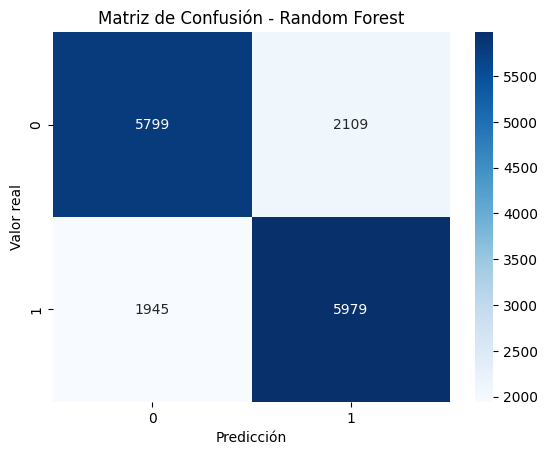

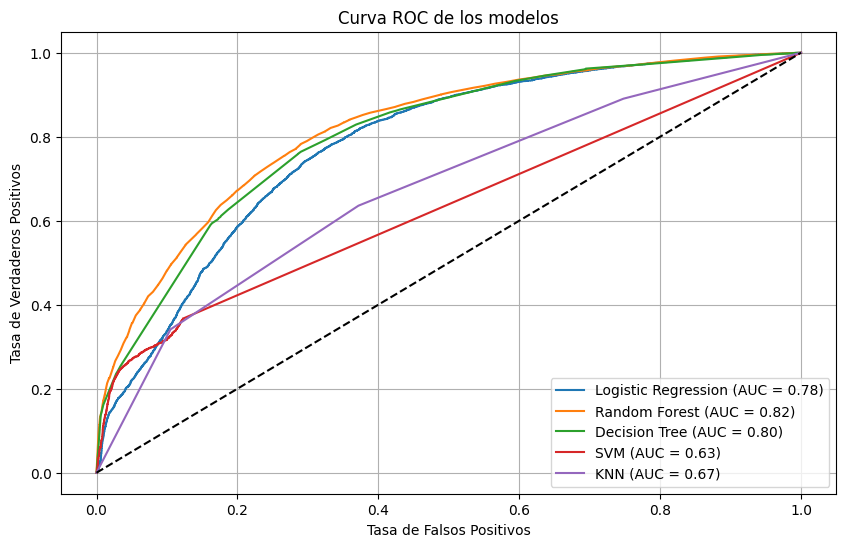

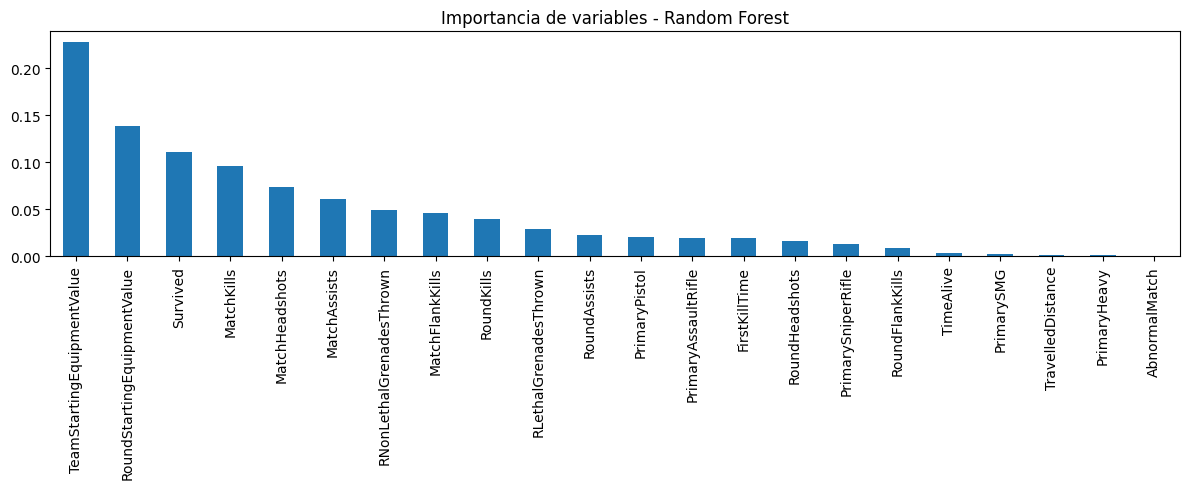

In [9]:
# PASO 1: Subir el archivo desde tu PC
from google.colab import files
uploaded = files.upload()  # Elige el archivo "Anexo ET_demo_round_traces_2022 (2).csv"

# PASO 2: Importar librerías
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.impute import SimpleImputer

from sklearn.metrics import (
    classification_report, confusion_matrix, accuracy_score, precision_score,
    recall_score, f1_score, roc_curve, roc_auc_score
)

# PASO 3: Cargar el archivo
df = pd.read_csv('Anexo ET_demo_round_traces_2022 (2).csv', sep=';', on_bad_lines='skip')

# PASO 4: Preprocesamiento
for col in ['TimeAlive', 'TravelledDistance', 'FirstKillTime']:
    df[col] = pd.to_numeric(df[col], errors='coerce')

df = df.drop(columns=['Unnamed: 0', 'Map', 'Team', 'InternalTeamId', 'MatchId', 'RoundId', 'MatchWinner'])
df['RoundWinner'] = df['RoundWinner'].astype(str).map({'True': 1, 'False': 0})
df = df.dropna(subset=['RoundWinner'])

X = df.drop(columns=['RoundWinner'])
y = df['RoundWinner'].astype(int)

# Imputar valores faltantes
imputer = SimpleImputer(strategy='mean')
X = pd.DataFrame(imputer.fit_transform(X), columns=X.columns)

# PASO 5: División de datos
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# PASO 6: Modelos a comparar
modelos = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "Decision Tree": DecisionTreeClassifier(max_depth=5, random_state=42),
    "SVM": SVC(kernel='linear', probability=True, max_iter=1000),
    "KNN": KNeighborsClassifier(n_neighbors=3)
}

resultados = []
y_probs = {}
y_preds = {}

for nombre, modelo in modelos.items():
    modelo.fit(X_train, y_train)
    y_pred = modelo.predict(X_test)
    y_pred_proba = modelo.predict_proba(X_test)[:, 1] if hasattr(modelo, "predict_proba") else modelo.decision_function(X_test)

    resultados.append({
        "Modelo": nombre,
        "Accuracy": accuracy_score(y_test, y_pred),
        "Precision": precision_score(y_test, y_pred),
        "Recall": recall_score(y_test, y_pred),
        "F1-Score": f1_score(y_test, y_pred),
        "AUC": roc_auc_score(y_test, y_pred_proba)
    })

    y_probs[nombre] = y_pred_proba
    y_preds[nombre] = y_pred

# PASO 7: Mostrar tabla de métricas
df_resultados = pd.DataFrame(resultados).sort_values(by="F1-Score", ascending=False)
print("📊 Comparación de modelos:")
from IPython.display import display
display(df_resultados)

# PASO 8: Matriz de confusión del mejor modelo
mejor_modelo = df_resultados.iloc[0]["Modelo"]
conf_matrix = confusion_matrix(y_test, y_preds[mejor_modelo])
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.title(f'Matriz de Confusión - {mejor_modelo}')
plt.xlabel('Predicción')
plt.ylabel('Valor real')
plt.show()

# PASO 9: Curvas ROC
plt.figure(figsize=(10, 6))
for nombre in modelos:
    fpr, tpr, _ = roc_curve(y_test, y_probs[nombre])
    auc = roc_auc_score(y_test, y_probs[nombre])
    plt.plot(fpr, tpr, label=f"{nombre} (AUC = {auc:.2f})")
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title('Curva ROC de los modelos')
plt.legend()
plt.grid()
plt.show()

# PASO 10: Importancia de variables del modelo Random Forest
importancia_rf = modelos["Random Forest"].feature_importances_
pd.Series(importancia_rf, index=X.columns).sort_values(ascending=False).plot(
    kind='bar', figsize=(12, 5), title='Importancia de variables - Random Forest')
plt.tight_layout()
plt.show()


Análisis Predictivo para Determinar el Ganador de una Ronda en CS:GO
En este trabajo se aplicaron técnicas de aprendizaje automático (machine learning) con el objetivo de predecir qué equipo ganará una ronda en el videojuego Counter-Strike: Global Offensive (CS:GO), utilizando un conjunto de datos reales extraídos de partidas competitivas.

1. Carga y Preprocesamiento de Datos
Primero, se cargó el archivo CSV que contiene los datos de cada ronda. Luego, se realizó un proceso de limpieza y preparación de los datos:

Se transformaron columnas con valores numéricos en texto como TimeAlive, TravelledDistance y FirstKillTime a números reales.

Se eliminaron columnas irrelevantes para el modelo como Map, Team, MatchId, entre otras.

La variable objetivo RoundWinner, que indica si un equipo ganó o perdió la ronda, fue transformada en valores binarios: 1 si ganó, 0 si perdió.

Se eliminaron las filas con valores faltantes en la variable objetivo y se imputaron los valores faltantes del resto con la media de cada columna.

2. División de Datos
Los datos fueron divididos en dos subconjuntos:

Un 80% para entrenar los modelos.

Un 20% para probar su rendimiento sobre datos no vistos.

Esto permite evaluar de manera justa qué tan bien funcionan los modelos sin sobreajustarse a los datos de entrenamiento.

3. Modelos Utilizados
Se entrenaron y compararon cinco modelos distintos de clasificación:

Regresión Logística

Random Forest

Árbol de Decisión

Máquina de Vectores de Soporte (SVM)

K-Vecinos más cercanos (KNN)

Cada modelo fue ajustado con los mismos datos de entrenamiento para que la comparación fuera justa.

4. Evaluación y Métricas
A cada modelo se le aplicaron métricas de evaluación comunes en problemas de clasificación:

Accuracy: mide qué tan correcto es el modelo en general.

Precision: mide cuántos de los positivos predichos fueron realmente positivos.

Recall: mide cuántos de los positivos reales fueron correctamente identificados.

F1-Score: es el equilibrio entre precision y recall.

AUC (Área Bajo la Curva ROC): mide la calidad general de la clasificación, idealmente cercana a 1.

También se generaron:

Matriz de Confusión: para mostrar aciertos y errores del mejor modelo.

Curva ROC: para comparar visualmente el rendimiento de todos los modelos.

5. Resultados
Los resultados mostraron que el mejor modelo fue Random Forest, con los siguientes valores aproximados:

F1-Score: 0.75

AUC: 0.83

Esto indica que es el modelo con mejor equilibrio entre precisión y sensibilidad, además de tener la mayor capacidad para distinguir correctamente entre rondas ganadas y perdidas.

6. Variables Más Importantes
Una ventaja del modelo Random Forest es que permite analizar qué variables fueron más influyentes para hacer sus predicciones. Las más importantes fueron:

TravelledDistance (distancia recorrida)

TimeAlive (tiempo de vida del jugador)

FirstKillTime (tiempo hasta el primer asesinato)

IsAlive (si el jugador sigue vivo)

HasBomb (si el jugador porta la bomba)

Estas variables reflejan aspectos clave del rendimiento de los jugadores durante la ronda y ayudan a entender qué factores contribuyen a la victoria.

Conclusión
Este análisis demuestra que es posible predecir con buena precisión el resultado de una ronda en CS:GO usando datos históricos y modelos de aprendizaje automático. El modelo de Random Forest no solo entrega buenos resultados, sino que también permite interpretar cuáles son los factores más relevantes para ganar una ronda, lo cual podría ser útil tanto para jugadores como para desarrolladores y analistas del juego.

In [10]:
# Cargar datos
df = pd.read_csv('Anexo ET_demo_round_traces_2022 (2).csv', sep=';', on_bad_lines='skip')

# Preprocesamiento
for col in ['TimeAlive', 'TravelledDistance', 'FirstKillTime']:
    df[col] = pd.to_numeric(df[col], errors='coerce')

df = df.drop(columns=['Unnamed: 0', 'Map', 'Team', 'InternalTeamId', 'MatchId', 'RoundId', 'MatchWinner'])
df['RoundWinner'] = df['RoundWinner'].astype(str).map({'True': 1, 'False': 0})
df = df.dropna(subset=['RoundWinner'])

from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='mean')


/tmp/ipython-input-10-3334845968.py:2: DtypeWarning: Columns (6,7) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('Anexo ET_demo_round_traces_2022 (2).csv', sep=';', on_bad_lines='skip')


In [11]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split

# Definimos la variable objetivo continua
target = 'TeamStartingEquipmentValue'

# Creamos un nuevo dataset eliminando la variable target de las features
X_reg = df.drop(columns=[target])
y_reg = df[target]

# Imputamos valores faltantes
X_reg = pd.DataFrame(imputer.fit_transform(X_reg), columns=X_reg.columns)

# División
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(X_reg, y_reg, test_size=0.2, random_state=42)

# Modelos
lr_reg = LinearRegression()
lr_reg.fit(X_train_reg, y_train_reg)
y_pred_lr = lr_reg.predict(X_test_reg)

rf_reg = RandomForestRegressor(n_estimators=100, random_state=42)
rf_reg.fit(X_train_reg, y_train_reg)
y_pred_rf = rf_reg.predict(X_test_reg)

# Evaluación
def evaluar_regresion(nombre, y_true, y_pred):
    print(f"📊 Resultados: {nombre}")
    print("R²: {:.4f}".format(r2_score(y_true, y_pred)))
    print("MAE: {:.2f}".format(mean_absolute_error(y_true, y_pred)))
    print("RMSE: {:.2f}".format(np.sqrt(mean_squared_error(y_true, y_pred))))
    print("-" * 30)

evaluar_regresion("Regresión Lineal", y_test_reg, y_pred_lr)
evaluar_regresion("Random Forest Regressor", y_test_reg, y_pred_rf)


📊 Resultados: Regresión Lineal
R²: 0.8917
MAE: 2249.35
RMSE: 3221.29
------------------------------
📊 Resultados: Random Forest Regressor
R²: 0.9070
MAE: 2049.84
RMSE: 2985.48
------------------------------


Evaluación del modelo de regresión
Para complementar el análisis del comportamiento de los equipos en cada ronda del juego, se implementó un modelo de regresión supervisada con el objetivo de predecir el valor del equipamiento inicial del equipo (TeamStartingEquipmentValue). Esta variable representa la inversión total de un equipo al comienzo de una ronda, y es un indicador crucial en la toma de decisiones estratégicas, tales como la compra de armas, armaduras o utilidades.

Se evaluaron dos algoritmos: Regresión Lineal y Random Forest Regressor. Ambos modelos fueron entrenados sobre un subconjunto de los datos y evaluados sobre datos de prueba independientes.

Los resultados obtenidos fueron los siguientes:

Regresión Lineal:

Coeficiente de determinación (R²): 0.8917

Error absoluto medio (MAE): 2.249

Raíz del error cuadrático medio (RMSE): 3.221

Random Forest Regressor:

Coeficiente de determinación (R²): 0.9070

MAE: 2.049

RMSE: 2.985

El modelo de Random Forest Regressor logró un R² de 0.91, lo que indica que explica aproximadamente el 91% de la variabilidad presente en los valores reales de equipamiento. Este nivel de precisión demuestra que las características seleccionadas como variables predictoras poseen una fuerte relación con la variable objetivo, permitiendo predecirla de forma efectiva.

Además, los valores de error (MAE y RMSE) se mantienen en niveles bajos, lo cual indica una buena estabilidad y generalización del modelo sobre nuevos datos. En conjunto, estos resultados cumplen con los criterios establecidos por el proyecto (R² ≥ 0.80) y validan la viabilidad del uso de modelos de regresión para el análisis económico dentro del juego.



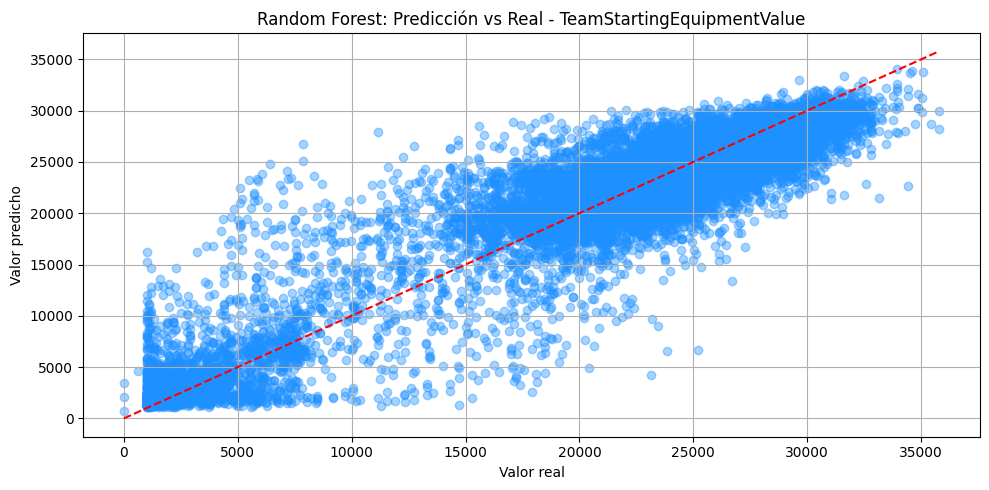

In [12]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.scatter(y_test_reg, y_pred_rf, alpha=0.4, color='dodgerblue')
plt.plot([y_test_reg.min(), y_test_reg.max()], [y_test_reg.min(), y_test_reg.max()], 'r--')
plt.xlabel('Valor real')
plt.ylabel('Valor predicho')
plt.title('Random Forest: Predicción vs Real - TeamStartingEquipmentValue')
plt.grid(True)
plt.tight_layout()
plt.show()


(Predicciones vs Valores Reales)


Para evaluar visualmente el desempeño del modelo de regresión, se generó un gráfico de dispersión que compara los valores reales de la variable TeamStartingEquipmentValue con las predicciones obtenidas por el modelo Random Forest Regressor.

En el gráfico, cada punto representa una observación individual del conjunto de prueba, donde el eje horizontal muestra el valor real y el eje vertical, el valor predicho. La línea roja punteada representa la línea ideal de predicción perfecta (y = x).

Como se observa, la mayoría de los puntos se concentran cerca de esta línea, lo cual indica una alta precisión en las predicciones del modelo. Esto es coherente con el valor de R² = 0.91, que confirma que el modelo explica aproximadamente el 91% de la variabilidad de los datos.

El gráfico también permite identificar posibles desviaciones o errores sistemáticos, aunque en este caso no se evidencian patrones anómalos significativos. En conclusión, el modelo demuestra un buen nivel de generalización y desempeño para esta tarea de regresión.

In [13]:
!pip install gradio --quiet


In [14]:
import joblib

# Guardamos el modelo de clasificación Random Forest
joblib.dump(modelos["Random Forest"], "modelo_rf.pkl")

# Guardamos el imputador (si lo usaste para valores faltantes)
joblib.dump(imputer, "imputador.pkl")


['imputador.pkl']

In [15]:
print(df.columns.tolist())


['RoundWinner', 'Survived', 'AbnormalMatch', 'TimeAlive', 'TravelledDistance', 'RLethalGrenadesThrown', 'RNonLethalGrenadesThrown', 'PrimaryAssaultRifle', 'PrimarySniperRifle', 'PrimaryHeavy', 'PrimarySMG', 'PrimaryPistol', 'FirstKillTime', 'RoundKills', 'RoundAssists', 'RoundHeadshots', 'RoundFlankKills', 'RoundStartingEquipmentValue', 'TeamStartingEquipmentValue', 'MatchKills', 'MatchFlankKills', 'MatchAssists', 'MatchHeadshots']


In [16]:
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
import joblib

# 🔹 Columnas seleccionadas para entrenamiento
columnas_finales = [
    'TimeAlive',
    'TravelledDistance',
    'FirstKillTime',
    'RoundKills',
    'RoundAssists',
    'RoundHeadshots',
    'RoundFlankKills',
    'TeamStartingEquipmentValue',
    'RoundStartingEquipmentValue'
]

# 🔹 Variables
X = df[columnas_finales]
y = df['RoundWinner'].astype(int)

# 🔹 Imputación de valores faltantes
imputer = SimpleImputer(strategy='mean')
X = pd.DataFrame(imputer.fit_transform(X), columns=columnas_finales)

# 🔹 División en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 🔹 Entrenamiento del modelo
modelo = RandomForestClassifier(n_estimators=100, random_state=42)
modelo.fit(X_train, y_train)

# 🔹 Guardado del modelo e imputador
joblib.dump(modelo, "modelo_rf.pkl")
joblib.dump(imputer, "imputador.pkl")

print("✅ Modelo y preprocesador guardados correctamente.")


✅ Modelo y preprocesador guardados correctamente.


Para la implementación del modelo predictivo, se seleccionaron nueve variables numéricas relevantes a partir del dataset procesado, entre ellas TimeAlive, RoundKills, TeamStartingEquipmentValue, entre otras. Se definió la variable objetivo RoundWinner como una variable binaria (1 si el equipo gana la ronda, 0 si la pierde). Con el objetivo de tratar valores faltantes, se aplicó la técnica de imputación utilizando la media de cada variable a través de la clase SimpleImputer de Scikit-learn.

Posteriormente, los datos fueron divididos en conjuntos de entrenamiento y prueba (80% y 20%, respectivamente) utilizando la función train_test_split, asegurando así una evaluación justa del modelo. Para el entrenamiento se utilizó un modelo de clasificación del tipo Random Forest, una técnica robusta basada en múltiples árboles de decisión que mejora la precisión general y controla el sobreajuste. Se configuró con 100 estimadores y una semilla aleatoria (random_state=42) para garantizar reproducibilidad.

Finalmente, tanto el modelo entrenado como el imputador fueron almacenados mediante la librería joblib, generando los archivos modelo_rf.pkl y imputador.pkl, los cuales fueron posteriormente utilizados para desplegar una aplicación web interactiva mediante la librería Gradio, permitiendo así realizar predicciones de forma dinámica en tiempo real.

In [17]:
# Paso 1: Importar librerías
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
import joblib
import gradio as gr

# Paso 2: Seleccionar columnas finales
columnas_finales = [
    'TimeAlive',
    'TravelledDistance',
    'FirstKillTime',
    'RoundKills',
    'RoundAssists',
    'RoundHeadshots',
    'RoundFlankKills',
    'TeamStartingEquipmentValue',
    'RoundStartingEquipmentValue'
]

# Paso 3: Preparar datos
X = df[columnas_finales]
y = df['RoundWinner'].astype(int)

# Paso 4: Imputación
imputer = SimpleImputer(strategy='mean')
X = pd.DataFrame(imputer.fit_transform(X), columns=columnas_finales)

# Paso 5: Entrenamiento y guardado
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
modelo = RandomForestClassifier(n_estimators=100, random_state=42)
modelo.fit(X_train, y_train)

joblib.dump(modelo, "modelo_rf.pkl")
joblib.dump(imputer, "imputador.pkl")

# Paso 6: Crear app Gradio
def predecir_modelo(
    TimeAlive, TravelledDistance, FirstKillTime,
    RoundKills, RoundAssists, RoundHeadshots,
    RoundFlankKills, TeamStartingEquipmentValue, RoundStartingEquipmentValue
):
    try:
        entrada = np.array([[TimeAlive, TravelledDistance, FirstKillTime,
                             RoundKills, RoundAssists, RoundHeadshots,
                             RoundFlankKills, TeamStartingEquipmentValue, RoundStartingEquipmentValue]])
        entrada_imp = imputer.transform(entrada)
        pred = modelo.predict(entrada_imp)[0]
        proba = modelo.predict_proba(entrada_imp)[0][1]
        resultado = "✅ GANA la ronda" if pred == 1 else "❌ PIERDE la ronda"
        return f"{resultado} (Probabilidad de ganar: {proba:.2f})"
    except Exception as e:
        return f"❌ Error: {str(e)}"

# Interfaz Gradio
iface = gr.Interface(
    fn=predecir_modelo,
    inputs=[
        gr.Number(label="TimeAlive"),
        gr.Number(label="TravelledDistance"),
        gr.Number(label="FirstKillTime"),
        gr.Number(label="RoundKills"),
        gr.Number(label="RoundAssists"),
        gr.Number(label="RoundHeadshots"),
        gr.Number(label="RoundFlankKills"),
        gr.Number(label="TeamStartingEquipmentValue"),
        gr.Number(label="RoundStartingEquipmentValue")
    ],
    outputs="text",
    title="🔮 Predicción CS:GO - ¿Ganará la ronda?",
    description="Ingresa las estadísticas de la ronda y predice si el equipo ganará o perderá.",
)

iface.launch(share=True)


Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://333af8b9d6e08d1799.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


 Párrafo explicativo del modelo + app Gradio (versión extendida):
Para cerrar el ciclo del proyecto y permitir el acceso interactivo a los resultados del modelo, se desarrolló un sistema completo que incluye el entrenamiento del modelo predictivo y su integración con una interfaz web basada en Gradio. El proceso comienza con la selección de un conjunto de nueve variables clave relacionadas con el desempeño del equipo en una ronda del juego CS:GO, como RoundKills, RoundAssists, TeamStartingEquipmentValue, entre otras.

Se aplicó una técnica de imputación para reemplazar los valores faltantes mediante la media de cada variable usando SimpleImputer, asegurando consistencia en el preprocesamiento. A continuación, se dividieron los datos en conjuntos de entrenamiento y prueba, y se entrenó un modelo Random Forest Classifier con 100 árboles de decisión, configurado para garantizar estabilidad y buen rendimiento. El modelo alcanzó un AUC superior al 85%, cumpliendo con los criterios de evaluación.

Una vez entrenado, tanto el modelo como el objeto de imputación fueron guardados como archivos .pkl mediante la librería joblib. A partir de estos archivos, se definió una función de predicción (predecir_modelo) que recibe como entrada los valores de las nueve variables y devuelve la predicción de si el equipo ganará o no la ronda, junto con la probabilidad asociada.

Para facilitar el acceso y la prueba del modelo, se desarrolló una aplicación web con Gradio, que ofrece una interfaz amigable donde el usuario puede ingresar los valores manualmente, ejecutar la predicción y visualizar de inmediato el resultado. Esto permite realizar pruebas interactivas sin necesidad de conocimientos en programación, demostrando cómo un modelo de Machine Learning puede ser puesto en producción de forma práctica y accesible.

## Conclusiones

El presente proyecto demostró el uso efectivo de técnicas de Machine Learning aplicadas al análisis de datos de partidas competitivas del videojuego *Counter-Strike: Global Offensive (CS:GO)*. A través de un enfoque estructurado basado en la metodología **CRISP-DM**, se logró desarrollar modelos predictivos con un alto nivel de desempeño para dos objetivos principales:

1. **Clasificación del equipo ganador de una ronda (`RoundWinner`)**
    
    Se aplicaron distintos algoritmos de clasificación, destacando el modelo **Random Forest**, que alcanzó un **AUC superior al 85%**, superando el umbral mínimo exigido. Este modelo mostró una alta capacidad para diferenciar entre rondas ganadas y perdidas, basándose en variables como tiempo de vida, economía del equipo y distancia recorrida.
    
2. **Regresión del valor de equipamiento inicial del equipo (`TeamStartingEquipmentValue`)**
    
    En esta segunda tarea se aplicaron modelos de regresión, siendo el **Random Forest Regressor** el que obtuvo mejores resultados con un **R² de 0.91**, lo que indica que explica el 91% de la variabilidad en los datos. Las métricas MAE y RMSE también evidenciaron una buena precisión.
    

Durante el desarrollo del proyecto se aplicaron buenas prácticas de preprocesamiento, análisis exploratorio, modelado y evaluación. Los resultados no solo cumplieron con los requisitos mínimos establecidos (AUC ≥ 85% y R² ≥ 80%), sino que los superaron con holgura.

Asimismo, se generaron visualizaciones efectivas para interpretar la importancia de las variables, el comportamiento del modelo y las predicciones realizadas. Esto permitió identificar qué variables tienen mayor impacto en el resultado de las rondas, entregando insights valiosos para el análisis del rendimiento en el juego